In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO
from pptx import Presentation
from pptx.util import Inches
import time

In [2]:
df = pd.read_excel("F:/pptx_py/data.xlsx")
df.head(5)

,Customer_ID,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0x1000,Alistair Barrf,17.375,913-74-1218,Lawyer,30625.94,2706.161667,6.0,5.0,27,...,Bad,1562.91,33.477546,10.458333,Yes,42.941090,158.549735,High_spent_Medium_value_payments,335.375341,0
1,CUS_0x1009,Arunah,25.750,063-67-6938,Mechanic,52312.68,4250.390000,6.0,5.0,17,...,Standard,202.68,29.839984,30.714286,Yes,108.366467,146.679378,High_spent_Medium_value_payments,428.743155,1
2,CUS_0x100b,Shirboni,18.500,238-62-0395,Media_Manager,113781.39,9549.782500,1.0,4.0,1,...,Good,1030.20,34.841449,15.571429,No,0.000000,505.386526,High_spent_Large_value_payments,781.229776,0
3,CUS_0x1011,Schneyerh,43.875,793-05-8223,Doctor,58918.47,5208.872500,3.0,3.0,17,...,Standard,473.14,27.655897,15.541667,Yes,123.434939,311.060914,Low_spent_Medium_value_payments,332.642837,1
4,CUS_0x1013,Cameront,43.750,930-49-9615,Mechanic,98620.98,7962.415000,3.0,3.0,6,...,Good,1233.51,31.933940,17.535714,No,228.018084,355.442408,High_spent_Medium_value_payments,472.781009,1


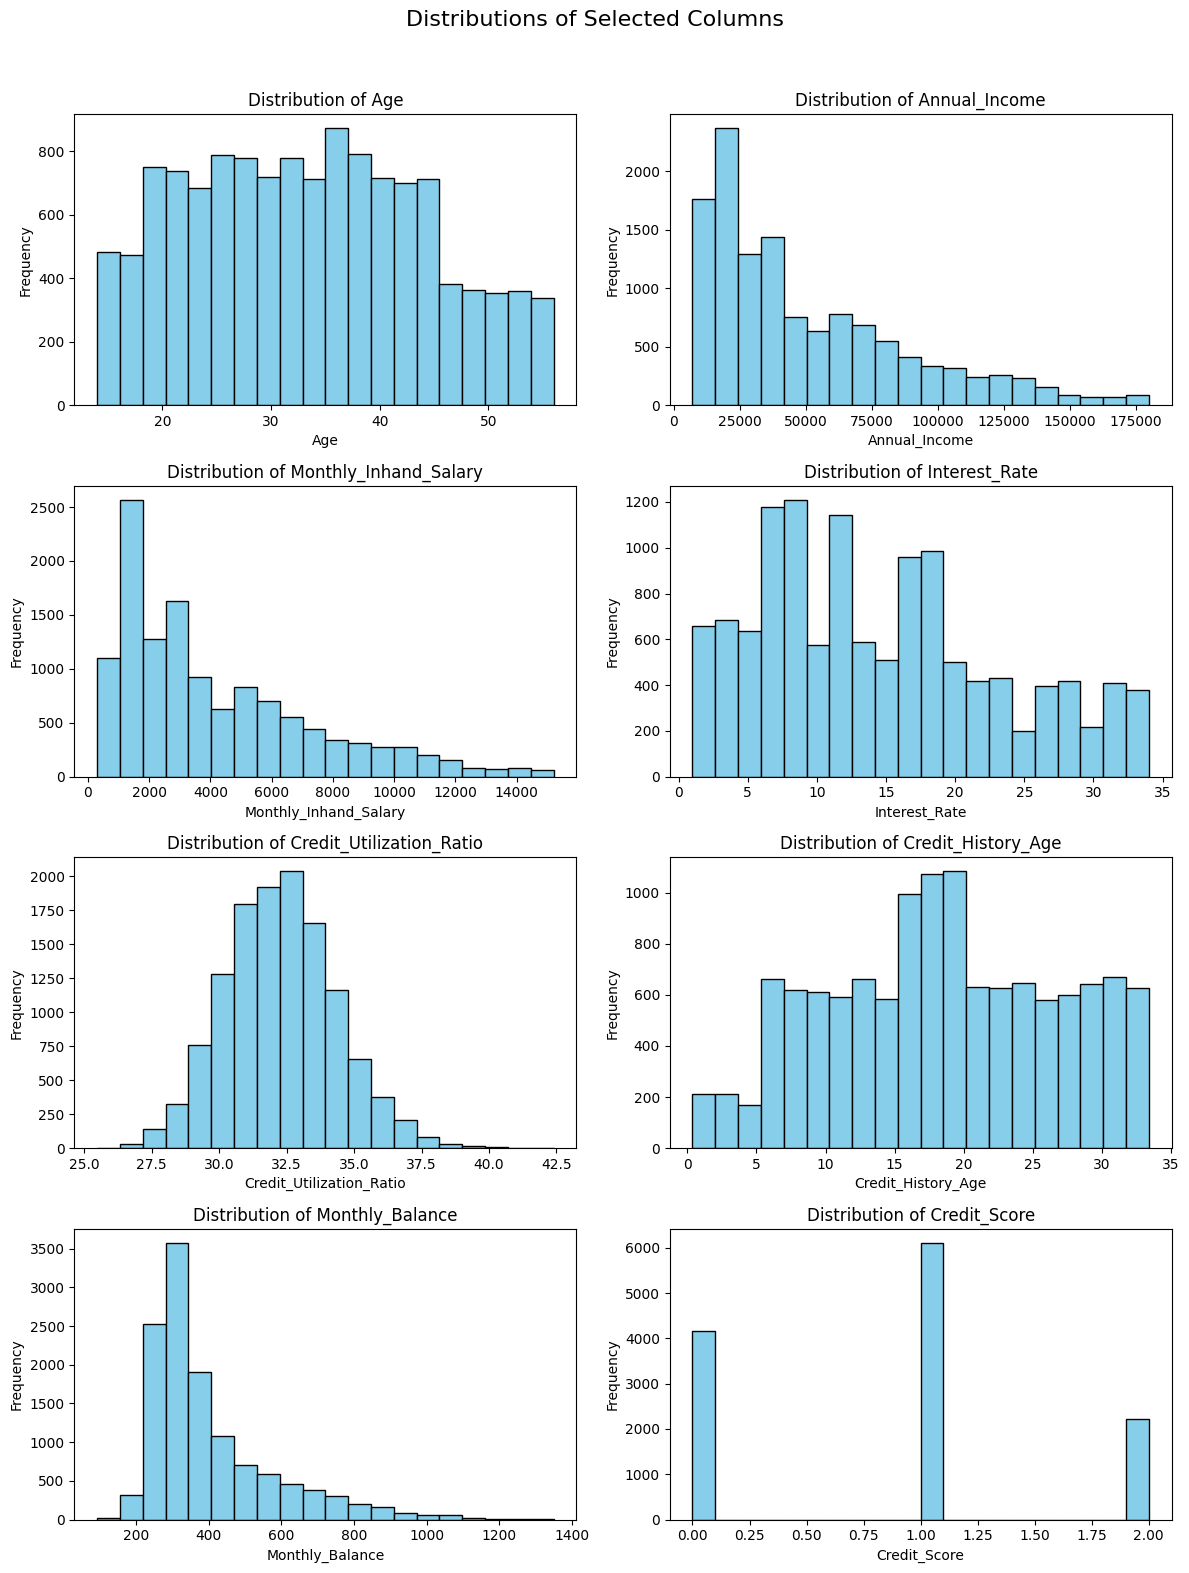

In [3]:
columns_of_interest = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Interest_Rate', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Monthly_Balance', 'Credit_Score']


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
fig.suptitle('Distributions of Selected Columns', fontsize=16)

axes = axes.flatten()
for i, column in enumerate(columns_of_interest):
    axes[i].hist(df[column], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Data to PPTX 

In [4]:
start_time = time.time()

df = pd.read_excel("F:/pptx_py/data.xlsx")
numerical_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Credit_Utilization_Ratio', 'Credit_Score']
presentation = Presentation()

title_slide_layout = presentation.slide_layouts[0]
title_slide = presentation.slides.add_slide(title_slide_layout)
title = title_slide.shapes.title
subtitle = title_slide.placeholders[1]
title.text = "Data Analysis Presentation"
subtitle.text = "Analyzing Relationships between Age and Various Numerical Columns"

for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['Age'], df[col], color='lightblue', label='Data Points')
    polyfit = np.polyfit(df['Age'], df[col], 1)
    regression_line = np.polyval(polyfit, df['Age'])
    plt.plot(df['Age'], regression_line, color='black', linestyle='-', label='Regression Line')
    plt.title(f'Relationship between Age and {col}\nEquation: y = {round(polyfit[0], 2)} * x + {round(polyfit[1], 2)}')
    plt.xlabel('Age')
    plt.ylabel(col)
    plt.grid(True, ls ='-.', alpha =0.3)
    plt.legend()

    image_stream = BytesIO()
    plt.savefig(image_stream, format='png')
    plt.close()

    content_slide_layout = presentation.slide_layouts[5]
    content_slide = presentation.slides.add_slide(content_slide_layout)

    title_shape = content_slide.shapes.title
    title_shape.text = f"Relationship between Age and {col}"

    left = Inches(1)
    top = Inches(1.5)
    pic = content_slide.shapes.add_picture(image_stream, left, top, width=Inches(8))

# Save presentation
presentation.save("F:/pptx_py/data_exportto_Presentation.pptx")
end_time = time.time()
duration = end_time - start_time
duration_str = time.strftime("%H:%M:%S", time.gmtime(duration))
current_time = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
print(f"Done at {current_time}. Duration: {duration_str}") 

Done at 2024-02-22 09:26:43. Duration: 00:00:04
